### Imports

In [261]:
import pandas as pd
import csv
import co

#### loading and preparing dataset

In [155]:
data_df = pd.read_csv('data/inside_data.csv')
data_df['authors'] = data_df.authors.apply(lambda x: x.replace("\n", "").replace("@", " @"))
data_df['article_text'] = data_df.article_text.apply(lambda x: x.replace("['Filed under:'", "").replace(',', "").replace('\'', ""))
data_df

,url,pub_date,authors,hed,article_text,article_comment_num
0,https://www.insidenu.com/2023/7/7/23786975/bre...,2023-07-07T16:28:46,By David Gold @davidgoldINU Ju...,BREAKING: Investigation finds hazing inside No...,Not a good start to the summer for NU. Share ...,[]
1,https://www.insidenu.com/2023/7/8/23787568/aft...,2023-07-08T17:24:27,By John Ferrara @byjohnf,"After a NASCAR visit, what sports should Chica...",A deep dive into sports leagues you’ve never ...,[]
2,https://www.insidenu.com/2023/7/9/23788516/nor...,2023-07-09T15:00:33,By Sophia Vlahakis @sophia_vlah...,Northwestern must learn to act — not respond —...,As an institution Northwestern has proven to ...,[]
3,https://www.insidenu.com/2023/7/10/23790160/ji...,2023-07-10T19:59:24,"By Ignacio Dowling, Bradley Loc...",BREAKING: Jim Foster accused of toxic workplac...,Another wave of controversy hits Northwestern...,[]
4,https://www.insidenu.com/2023/7/10/23789970/re...,2023-07-10T17:56:51,By Bradley Locker @Bradley_Lock...,Recent former Northwestern player: Allegations...,The former player details the hazing incident...,[]
...,...,...,...,...,...,...
531,https://www.insidenu.com/2023/12/30/24019590/t...,2023-12-30T19:00:53,"By Taylor Hancock Dec 30, 2023...",Three takeaways from Northwestern’s confusing ...,Embracing the good and the bad. Share this st...,[]
532,https://www.insidenu.com/2023/12/31/24016921/i...,2023-12-31T20:58:45,By David Gold @davidgoldINU De...,Inside NU’s 2023 Wrapped,A year that will live in infamy. Share this s...,[]
533,https://www.insidenu.com/2023/12/31/24020380/n...,2023-12-31T20:01:35,By Ignacio Dowling @idowling11 ...,Northwestern’s fourth-quarter response could b...,The ‘Cats found the second spark they so desp...,[]
534,https://www.insidenu.com/2023/12/31/24020499/2...,2023-12-31T18:10:35,By Bradley Locker @Bradley_Lock...,2023 Northwestern football position reviews: O...,It was another year of frequent miscues for N...,[]


## calculations 💯

this section determines which rows had no text

In [147]:
co_hed = data_df.article_text.apply(lambda x: type(x).__name__)
test_bool = (co_hed == 'float')
test_bool.sum()

0

In [148]:
data_df['test'] = test_bool
hold = data_df.loc[data_df['test']]
for i in hold.url:
    print(f"{i} here it is")

running co occurence function

In [160]:
sports = ["football", "baseball", "volleyball"]
terms = ["scandal", "hazing", "misconduct", "firing", "interim"]

for i in sports:
    for j in terms:
        data_df[F"CO_{i}_{j}"] = data_df.article_text.apply(lambda z: co.co_check(i, j, z.lower()))
data_df

,url,pub_date,authors,hed,article_text,article_comment_num,CO_hazing_football,CO_football_scandal,CO_football_hazing,CO_football_misconduct,...,CO_baseball_scandal,CO_baseball_hazing,CO_baseball_misconduct,CO_baseball_firing,CO_baseball_interim,CO_volleyball_scandal,CO_volleyball_hazing,CO_volleyball_misconduct,CO_volleyball_firing,CO_volleyball_interim
0,https://www.insidenu.com/2023/7/7/23786975/bre...,2023-07-07T16:28:46,By David Gold @davidgoldINU Ju...,BREAKING: Investigation finds hazing inside No...,Not a good start to the summer for NU. Share ...,[],1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.insidenu.com/2023/7/8/23787568/aft...,2023-07-08T17:24:27,By John Ferrara @byjohnf,"After a NASCAR visit, what sports should Chica...",A deep dive into sports leagues you’ve never ...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.insidenu.com/2023/7/9/23788516/nor...,2023-07-09T15:00:33,By Sophia Vlahakis @sophia_vlah...,Northwestern must learn to act — not respond —...,As an institution Northwestern has proven to ...,[],1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,https://www.insidenu.com/2023/7/10/23790160/ji...,2023-07-10T19:59:24,"By Ignacio Dowling, Bradley Loc...",BREAKING: Jim Foster accused of toxic workplac...,Another wave of controversy hits Northwestern...,[],1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,https://www.insidenu.com/2023/7/10/23789970/re...,2023-07-10T17:56:51,By Bradley Locker @Bradley_Lock...,Recent former Northwestern player: Allegations...,The former player details the hazing incident...,[],1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,https://www.insidenu.com/2023/12/30/24019590/t...,2023-12-30T19:00:53,"By Taylor Hancock Dec 30, 2023...",Three takeaways from Northwestern’s confusing ...,Embracing the good and the bad. Share this st...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
532,https://www.insidenu.com/2023/12/31/24016921/i...,2023-12-31T20:58:45,By David Gold @davidgoldINU De...,Inside NU’s 2023 Wrapped,A year that will live in infamy. Share this s...,[],1,1,1,1,...,1,1,1,1,1,0,0,0,0,0
533,https://www.insidenu.com/2023/12/31/24020380/n...,2023-12-31T20:01:35,By Ignacio Dowling @idowling11 ...,Northwestern’s fourth-quarter response could b...,The ‘Cats found the second spark they so desp...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
534,https://www.insidenu.com/2023/12/31/24020499/2...,2023-12-31T18:10:35,By Bradley Locker @Bradley_Lock...,2023 Northwestern football position reviews: O...,It was another year of frequent miscues for N...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Word to vec?

In [270]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import json
import gensim

def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in words]
    return tokens

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

def remove_punctuations(tokens):
    return [word for word in tokens if word.isalnum()]

def train_word2vec_model(texts, min_count=2):
    sentences = [preprocess(text) for text in texts]
    model = gensim.models.Word2Vec(sentences, min_count=min_count)
    return model

def get_word_similarities(model, target_word, tokens):
    word_similarities = {}
    for word in tokens:
        if word in model.wv.key_to_index:
            similarity = model.wv.similarity(target_word, word)
            word_similarities[word] = similarity
    return word_similarities

def generate_word_cloud(word_similarities, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_similarities)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

def main(input_csv, target_word):
    nltk.download('punkt')
    nltk.download('stopwords')

    # Read CSV file
    df = pd.read_csv(input_csv)

    # Train Word2Vec model
    model = train_word2vec_model(df['text'])

    all_word_similarities = {}

    for index, row in df.iterrows():
        # Preprocess text data
        tokens = preprocess(row['text'])
        tokens = remove_stopwords(tokens)
        tokens = remove_punctuations(tokens)

        # Get word similarities
        word_similarities = get_word_similarities(model, target_word, tokens)

        # Generate word cloud with time range as title
        start_timestamp = row['start_timestamp']
        end_timestamp = row['end_timestamp']
        title = f"{start_timestamp} - {end_timestamp}"
        generate_word_cloud(word_similarities, title)

        # Convert float32 values to regular floats
        word_similarities = {word: float(similarity) for word, similarity in word_similarities.items()}

        # Save word similarities to dictionary
        all_word_similarities[title] = word_similarities

    # Save all word similarities to a JSON file
    with open('word2vec/word_similarities.json', 'w') as f:
        json.dump(all_word_similarities, f)


ModuleNotFoundError: No module named 'gensim'

### write it to a csv

In [161]:
data_df.to_csv('./data/inside_with_co.csv')

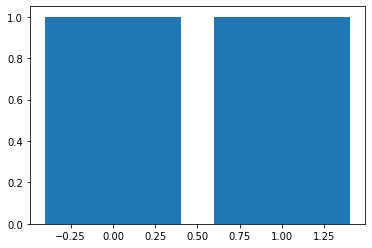

0.11567164179104478

In [265]:
import matplotlib.pyplot as plt

plt.bar(data_df.CO_football_hazing, data_df.CO_baseball_firing)
plt.show()
data_df.CO_football_interim.mean()

# SAME THING BUT FOR BEFORE DATASET

In [253]:
data_df2 = pd.read_csv('data/inside_data_BEFORE.csv')
data_df2['authors'] = data_df2.authors.apply(lambda x: x.replace("\n", "").replace("@", " @"))
data_df2['article_text'] = data_df2.article_text.apply(lambda x: x.replace("['Filed under:'", "").replace(',', "").replace('\'', ""))
data_df2


,url,pub_date,authors,hed,article_text,article_comment_num
0,https://www.insidenu.com/2021/7/7/22566789/thr...,2021-07-07T15:35:04,By Ben Chasen @BenChasenINU Ju...,Three-star lineman Austin Firestone commits to...,10 commitments since the start of June! Share...,[]
1,https://www.insidenu.com/2021/7/7/22564520/how...,2021-07-07T13:49:24,By Sydney Supple @Sydney_Supple...,How MatchPoint is helping Northwestern athlete...,Athletes are looking to new middleman apps to...,[]
2,https://www.insidenu.com/2021/7/8/22565043/202...,2021-07-08T14:30:00,By William Karmin @WilliamKarmi...,2021 Northwestern football positional previews...,#Joseph4Heisman Share this story Returning St...,[]
3,https://www.insidenu.com/2021/7/9/22567822/wha...,2021-07-09T14:23:03,By Ben Chasen @BenChasenINU Ju...,What could the new NIL rules mean for Northwes...,In short: a lot a little or maybe nothing at ...,[]
4,https://www.insidenu.com/2021/7/10/22567968/20...,2021-07-10T16:44:29,By Daniel Olinger @dan_olinger ...,2021 Northwestern football positional previews...,No changes here (yet). Share this story Key l...,[]
...,...,...,...,...,...,...
1464,https://www.insidenu.com/2023/6/13/23758595/fo...,2023-06-13T15:02:36,By Ethan Segall @SegallEthan J...,Football: Notes and thoughts on the Big Ten’s ...,Massive changes are coming to the Big Ten in ...,[]
1465,https://www.insidenu.com/2023/6/14/23758943/pr...,2023-06-14T16:45:41,By David Gold @davidgoldINU Ju...,Projecting Northwestern football’s depth chart...,Since Northwestern will likely not release on...,[]
1466,https://www.insidenu.com/2023/6/15/23760294/ro...,2023-06-15T16:32:01,"By Inside NU Archives Jun 15, ...",ROUNDTABLE: Favorite Northwestern sports momen...,No shortage of choices! Share this story Now ...,[]
1467,https://www.insidenu.com/2023/6/16/23763123/wa...,2023-06-16T15:16:19,"By Ryan Cole @rtc_2004 Jun 16,...",Way-too-early Big Ten men’s basketball power r...,It is ridiculously early. But that won’t stop...,[]


In [249]:
co_hed = data_df2.article_text.apply(lambda x: type(x).__name__)
test_bool = (co_hed == 'float')
test_bool.sum()

0

In [250]:
data_df2['test'] = test_bool
hold = data_df2.loc[data_df2['test']]
# count = 0
# for i in hold.url:
#     print(f"{i}")
#     # count+=1
print([i for i in hold.url])

[]


co-occurance function

In [254]:
sports = ["football", "baseball", "volleyball"]
terms = ["scandal", "hazing", "misconduct", "firing", "interim"]

for i in sports:
    for j in terms:
        data_df2[F"CO_{i}_{j}"] = data_df2.article_text.apply(lambda z: co.co_check(i, j, z.lower()))
data_df2

,url,pub_date,authors,hed,article_text,article_comment_num,CO_football_scandal,CO_football_hazing,CO_football_misconduct,CO_football_firing,...,CO_baseball_scandal,CO_baseball_hazing,CO_baseball_misconduct,CO_baseball_firing,CO_baseball_interim,CO_volleyball_scandal,CO_volleyball_hazing,CO_volleyball_misconduct,CO_volleyball_firing,CO_volleyball_interim
0,https://www.insidenu.com/2021/7/7/22566789/thr...,2021-07-07T15:35:04,By Ben Chasen @BenChasenINU Ju...,Three-star lineman Austin Firestone commits to...,10 commitments since the start of June! Share...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.insidenu.com/2021/7/7/22564520/how...,2021-07-07T13:49:24,By Sydney Supple @Sydney_Supple...,How MatchPoint is helping Northwestern athlete...,Athletes are looking to new middleman apps to...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.insidenu.com/2021/7/8/22565043/202...,2021-07-08T14:30:00,By William Karmin @WilliamKarmi...,2021 Northwestern football positional previews...,#Joseph4Heisman Share this story Returning St...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.insidenu.com/2021/7/9/22567822/wha...,2021-07-09T14:23:03,By Ben Chasen @BenChasenINU Ju...,What could the new NIL rules mean for Northwes...,In short: a lot a little or maybe nothing at ...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.insidenu.com/2021/7/10/22567968/20...,2021-07-10T16:44:29,By Daniel Olinger @dan_olinger ...,2021 Northwestern football positional previews...,No changes here (yet). Share this story Key l...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,https://www.insidenu.com/2023/6/13/23758595/fo...,2023-06-13T15:02:36,By Ethan Segall @SegallEthan J...,Football: Notes and thoughts on the Big Ten’s ...,Massive changes are coming to the Big Ten in ...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1465,https://www.insidenu.com/2023/6/14/23758943/pr...,2023-06-14T16:45:41,By David Gold @davidgoldINU Ju...,Projecting Northwestern football’s depth chart...,Since Northwestern will likely not release on...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1466,https://www.insidenu.com/2023/6/15/23760294/ro...,2023-06-15T16:32:01,"By Inside NU Archives Jun 15, ...",ROUNDTABLE: Favorite Northwestern sports momen...,No shortage of choices! Share this story Now ...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1467,https://www.insidenu.com/2023/6/16/23763123/wa...,2023-06-16T15:16:19,"By Ryan Cole @rtc_2004 Jun 16,...",Way-too-early Big Ten men’s basketball power r...,It is ridiculously early. But that won’t stop...,[],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [257]:
data_df2.to_csv('./data/inside_with_co_BEFORE.csv')

In [269]:
# data_df2['CO_football_hazing'].mean()
sports = ["football", "baseball", "volleyball"]
terms = ["scandal", "hazing", "misconduct", "firing", "interim"]

mean_dict = {}
before_mean = []
for i in sports:
    for j in terms:
        before_mean += [data_df2[F"CO_{i}_{j}"].mean()]
mean_dict['before'] = before_mean

after_mean = []
for i in sports:
    for j in terms:
        after_mean += [data_df[F"CO_{i}_{j}"].mean()]
mean_dict['after'] = after_mean

columns = []
for i in sports:
    for j in terms:
        columns += [F"CO_{i}_{j}_MEAN"]

mdf = pd.DataFrame(mean_dict)
mdf.index = columns
mdf

mdf.to_csv("./data/mean_data.csv")

